seeding for reproducibility

In [ ]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

importing dependencies

In [ ]:
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt

data creation

In [ ]:
#load and prepare the fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Data Preprocessing

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

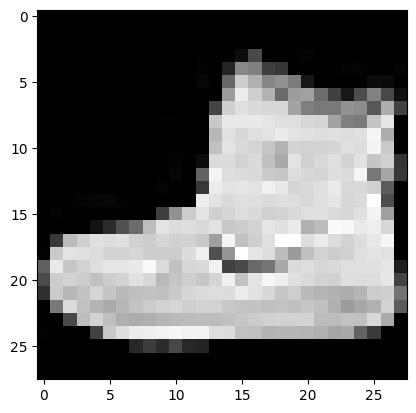

In [ ]:
#display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [ ]:
print(train_labels[0])

9


class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
#Reshape images to specify that its a single channgel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
train_images.shape

(60000, 28, 28, 1)

Convolutional Neural Network

In [ ]:
# build the cnn
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Training

In [ ]:
# softmax activation for FC layer
history=model.fit(train_images, train_labels, epochs=5,
                  validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.3570 - loss: 1.8710 - val_accuracy: 0.3988 - val_loss: 1.3573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4095 - loss: 1.3080 - val_accuracy: 0.4400 - val_loss: 1.2167
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5408 - loss: 1.1214 - val_accuracy: 0.6867 - val_loss: 0.9228
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7185 - loss: 0.8531 - val_accuracy: 0.7806 - val_loss: 0.7468
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8082 - loss: 0.6810 - val_accuracy: 0.8003 - val_loss: 0.6387


In [ ]:
# relu activation for FC layer
history=model.fit(train_images, train_labels, epochs=5,
                  validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7538 - loss: 0.6839 - val_accuracy: 0.8678 - val_loss: 0.3732
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8764 - loss: 0.3454 - val_accuracy: 0.8840 - val_loss: 0.3341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8943 - loss: 0.2909 - val_accuracy: 0.8914 - val_loss: 0.3094
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9066 - loss: 0.2551 - val_accuracy: 0.8939 - val_loss: 0.2973
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9150 - loss: 0.2283 - val_accuracy: 0.8967 - val_loss: 0.2945


Model Evaluation

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8967 - loss: 0.2945

Test accuracy: 0.8967000246047974


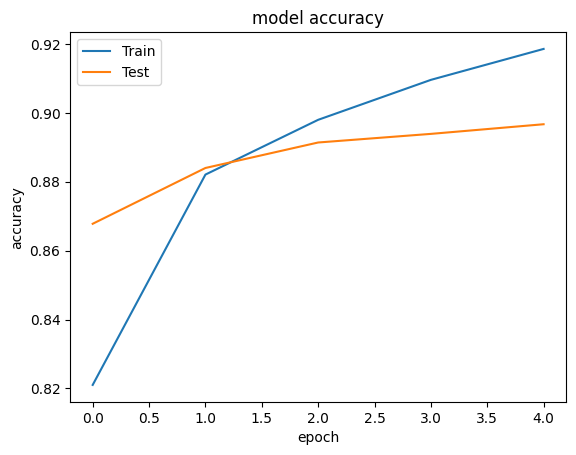

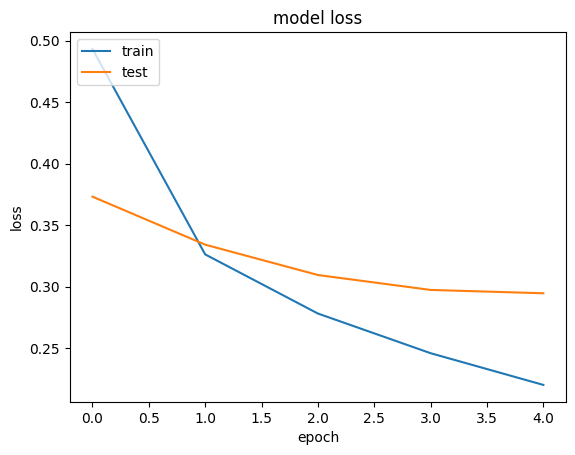

In [ ]:
# plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc="upper left")
plt.show()

In [ ]:
model.save('trained_fashion_mnist_model.h5')